<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from fastai.vision import *

In [23]:
import os
os.environ['TORCH_HOME'] = '/media/subhaditya/DATA/COSMO/Datasets-Useful'

In [3]:
path = Path('data/')

In [35]:
np.random.seed(42)
data = (ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(tfms=get_transforms())
        .databunch()
        .normalize(imagenet_stats) ) 

In [39]:
data

ImageDataBunch;

Train: LabelList (67200 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
A,A,A,A,A
Path: data;

Valid: LabelList (16800 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
F,J,O,V,K
Path: data;

Test: None

In [40]:
data.c

28

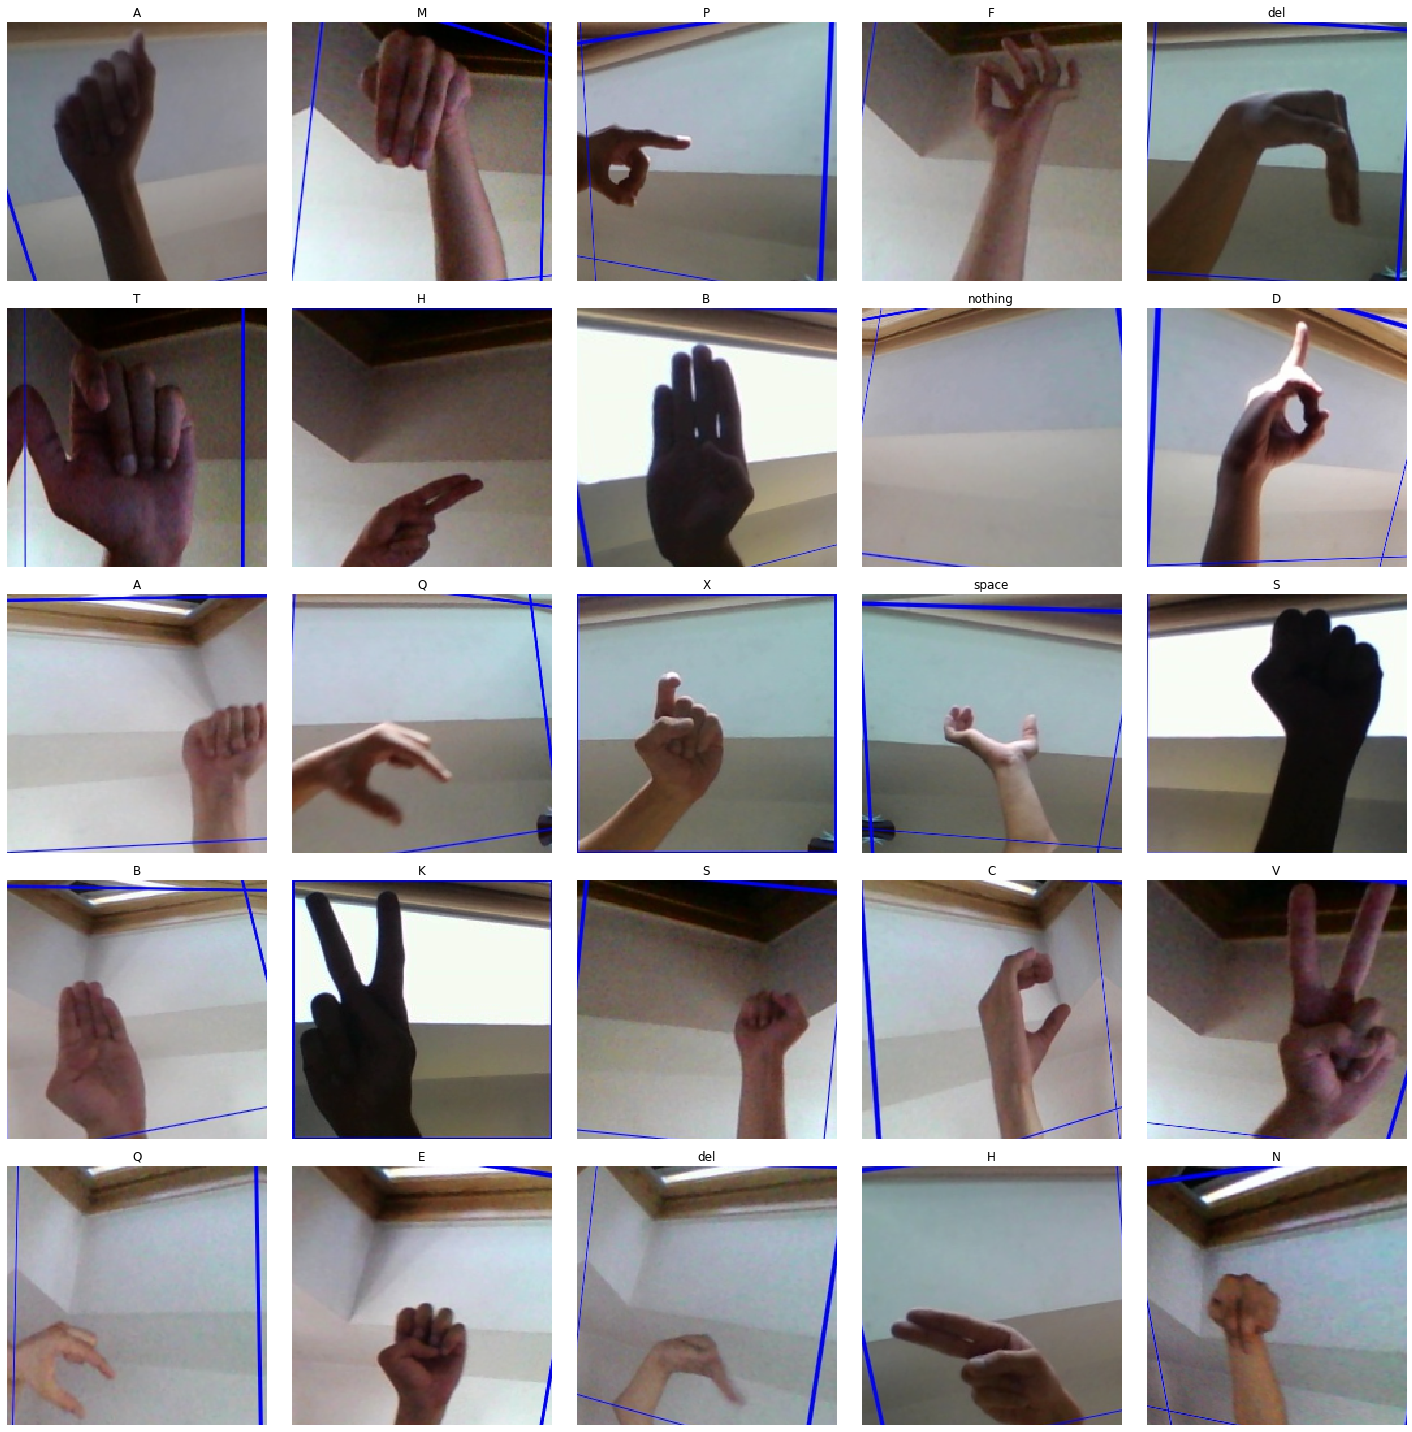

In [41]:
data.show_batch()

In [43]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


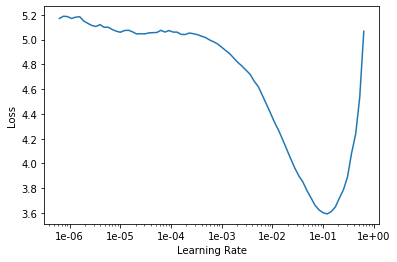

In [44]:
learner.lr_find()

learner.recorder.plot()

In [45]:
learner.fit_one_cycle(3, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.514719,0.392598,0.901369,01:48
1,0.166335,0.079859,0.977798,01:43
2,0.039215,0.002927,0.998988,01:43


In [81]:
learner.validate()

[0.0020891, tensor(0.9996)]

In [80]:
learner.unfreeze()
learner.fit_one_cycle(3, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.558585,6.152665,0.794345,02:27
1,0.170363,0.025240,0.990417,02:26
2,0.023177,0.002089,0.999643,02:29


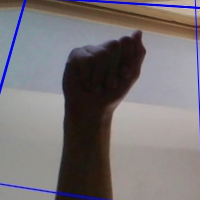

In [46]:
learner.data.train_ds[1][0]

In [47]:
learner.data.train_ds[1][1]

Category A

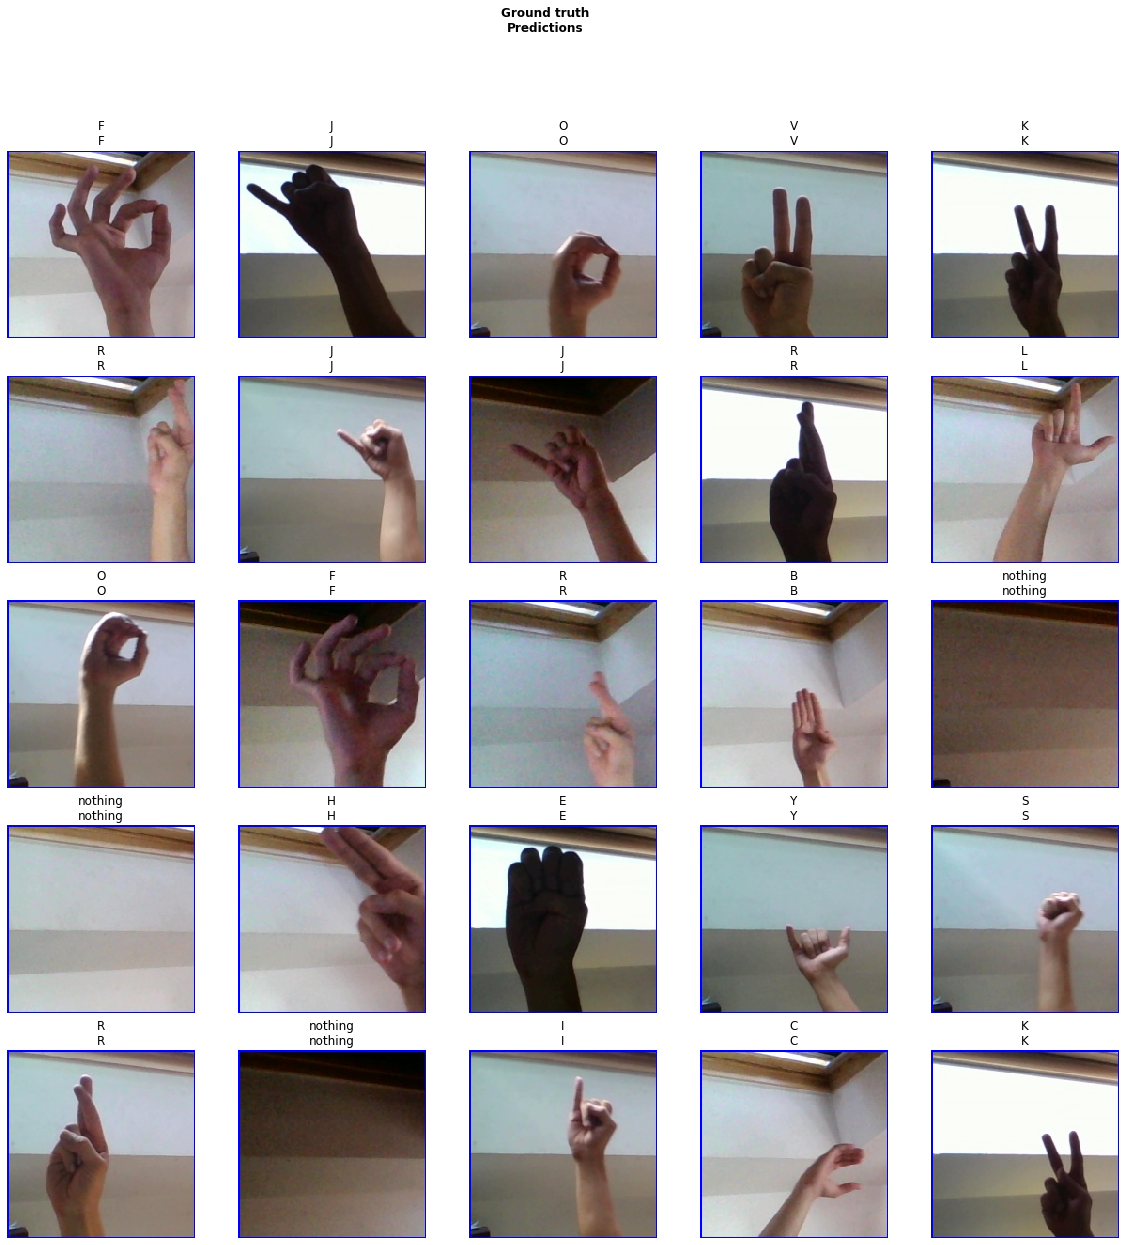

In [75]:
learner.show_results()

In [58]:
learner.export('fin')

In [59]:
learner.save('stage-1')

In [49]:
img = learner.data.train_ds[1][0]
learner.predict(img)

(Category A,
 tensor(0),
 tensor([1.0000e+00, 6.1400e-13, 4.8648e-18, 8.8461e-14, 1.1271e-14, 3.6947e-16,
         8.3846e-14, 3.8733e-13, 1.1730e-12, 3.1917e-13, 4.7112e-15, 1.2976e-15,
         2.2313e-12, 7.3663e-16, 2.9946e-17, 8.0953e-18, 6.1556e-19, 7.5096e-13,
         1.2650e-16, 1.1736e-13, 2.1056e-15, 2.6797e-20, 1.9068e-16, 3.5187e-12,
         6.0613e-12, 6.5092e-18, 8.1135e-13, 2.6706e-18]))

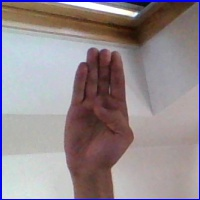

In [50]:
learner.data.valid_ds[100][0]

In [51]:
learner.data.valid_ds[100][1]

Category B

In [52]:
img = learner.data.valid_ds[100][0]
learner.predict(img)

(Category B,
 tensor(1),
 tensor([1.2633e-17, 1.0000e+00, 1.4459e-14, 5.9893e-22, 1.1611e-11, 4.9286e-19,
         1.6985e-21, 5.3309e-14, 2.9473e-16, 1.7539e-20, 6.6021e-18, 2.5221e-18,
         7.4226e-17, 5.8097e-17, 1.7540e-19, 3.9269e-20, 6.8104e-17, 4.7322e-18,
         2.8410e-21, 1.0173e-23, 4.9966e-15, 9.9442e-21, 1.6132e-14, 7.7258e-22,
         8.2723e-21, 5.9017e-17, 3.5430e-17, 3.2352e-20]))

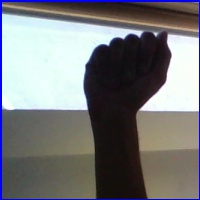

In [54]:
img = open_image('test/A_test.jpg')
img

In [55]:
%%time
learner.predict(img)

CPU times: user 102 ms, sys: 20.1 ms, total: 122 ms
Wall time: 20.7 ms


(Category A,
 tensor(0),
 tensor([1.0000e+00, 1.4478e-13, 1.6968e-17, 7.8758e-18, 3.3749e-10, 1.9643e-15,
         9.1236e-16, 3.4101e-14, 3.1767e-14, 4.4785e-15, 3.4845e-17, 1.9713e-16,
         1.8094e-10, 2.3624e-15, 5.6341e-16, 5.7534e-16, 6.8962e-17, 1.0912e-15,
         2.5917e-12, 1.4599e-09, 3.6206e-16, 1.0609e-19, 6.3368e-16, 2.5466e-13,
         3.1496e-13, 1.3817e-16, 2.1225e-12, 9.3964e-20]))

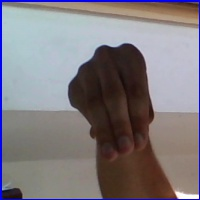

In [90]:
img = open_image('test/M_test.jpg')
img

In [91]:
learner.predict(img)


(Category M,
 tensor(12),
 tensor([4.4577e-11, 5.2967e-11, 9.5073e-14, 2.9711e-14, 4.7908e-11, 6.2333e-14,
         1.1231e-13, 2.1658e-14, 9.5828e-13, 2.7869e-11, 2.7670e-11, 1.3245e-16,
         9.9978e-01, 2.1624e-04, 2.8152e-12, 3.5172e-16, 2.8803e-14, 1.3236e-15,
         9.7828e-13, 5.1937e-14, 9.0607e-15, 7.5197e-17, 8.8592e-11, 4.2249e-15,
         2.1667e-12, 6.1997e-11, 1.8608e-14, 6.9862e-14]))